In [1]:
import numpy as np
import matplotlib.pyplot as plt
from finite_volume.advection import AdvectionSolver

In [2]:
# set up solver
solver_config = dict(
    n=(128,),
    order=8,
    courant=0.79,
    snapshot_dt=2 * np.pi / 10,
    num_snapshots=10,
)


# set up problem
def vortex(x, y):
    return -y, x


problem_config = dict(
    u0="disk",
    x=(-1, 1),
    y=(-1, 1),
    v=vortex,
    PAD=(0, 1),
    bc="dirichlet",
    const={"u": 0, "trouble": 0},
)

# set up slope limiter
limiter_config = dict(
    flux_strategy="transverse",
    aposteriori_limiting=True,
    fallback_limiter="PP2D",
    convex=True,
    SED=True,
)

# execute solver
solver = AdvectionSolver(
    **solver_config,
    **problem_config,
    **limiter_config,
)
solver.rkorder()

# print mpp violations
solver.report_mpp_violations()


                       worst     frequency          mean
         upper  -1.17059e-03   7.34574e-02              
         lower  -8.43164e-04   9.99021e-01              
         total  -1.17059e-03   9.99021e-01  -7.88532e-06



Plot solution

Text(0, 0.5, '$y$')

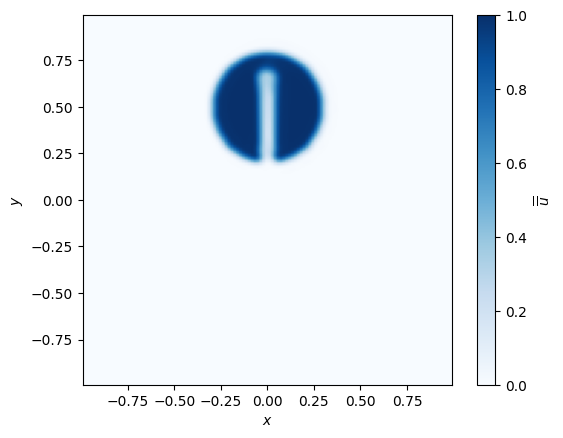

In [3]:
fig, ax = plt.subplots()
im = solver.plot_map(ax, cmap="Blues")
fig.colorbar(im, ax=ax, label="$\overline{\overline{u}}$")
plt.xlabel("$x$")
plt.ylabel("$y$")

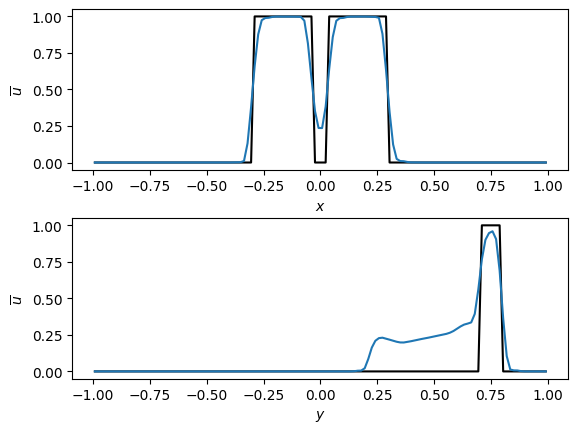

In [8]:
fig, axs = plt.subplots(2,1)

solver.plot_slice(axs[0], y=0.5, i=0, color='k')
solver.plot_slice(axs[0], y=0.5)
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$\overline{u}$")

solver.plot_slice(axs[1], x=0, i=0, color='k')
solver.plot_slice(axs[1], x=0)
axs[1].set_xlabel("$y$")
axs[1].set_ylabel("$\overline{u}$")

fig.subplots_adjust(hspace=0.3)

Plot $1 - \theta$ for _a priori_ slope limiting

Text(0, 0.5, '$y$')

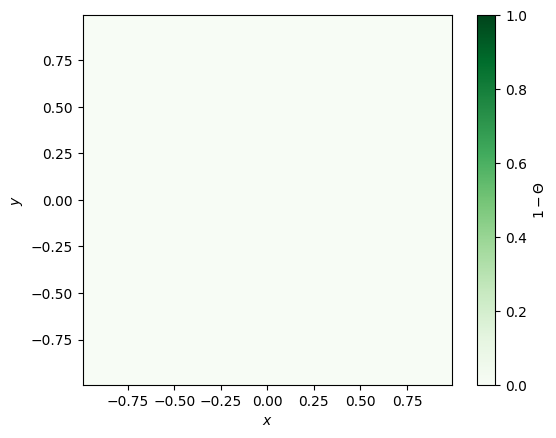

In [5]:
fig, ax = plt.subplots()
im = solver.plot_map(ax, mode = "theta", cmap="Greens")
fig.colorbar(im, ax=ax, label="$1 - \Theta$")
plt.xlabel("$x$")
plt.ylabel("$y$")

Plot troubled cell inditator for _a posteriori_ slope limiting

Text(0, 0.5, '$y$')

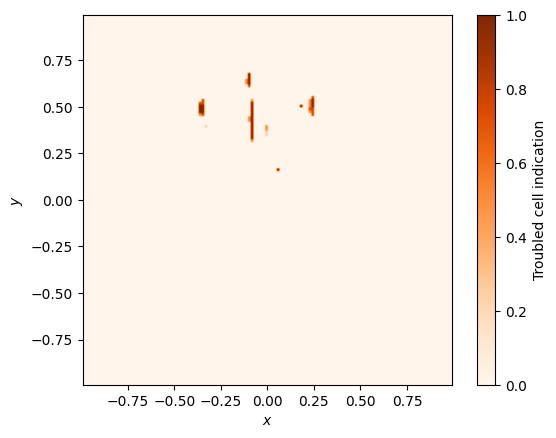

In [6]:
fig, ax = plt.subplots()
im = solver.plot_map(ax, mode = "trouble", cmap="Oranges")
fig.colorbar(im, ax=ax, label="Troubled cell indication")
plt.xlabel("$x$")
plt.ylabel("$y$")